In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [2]:
ts_length = 100
k = 2
sigma = 1
Time = np.arange(0, ts_length)
omega = np.pi/(np.linspace(1, k, k)*2)
coeffs = np.random.normal(0, sigma, (2, k))

In [39]:
print(coeffs)
print(" ")
print(coeffs[:, 0])
print(coeffs[1])

[[-0.31201389 -1.04898091]
 [-0.33909457 -0.1755208 ]]
 
[-0.31201389 -0.33909457]
[-0.33909457 -0.1755208 ]


In [4]:
TS = np.zeros(Time.shape[0])

for i in range(0, k):
    #result = coeffs[:, i][0] * np.cos(omega[i]*(np.pi/180)* Time)+ coeffs[:, i][1] * np.sin(omega[i]*(np.pi/180)* Time)
    result = coeffs[:, i][0] * np.cos(omega[i]* Time)+ coeffs[:, i][1] * np.sin(omega[i]* Time)
    TS = TS + result
    print(TS.shape)
    

(100,)
(100,)


<IPython.core.display.Javascript object>


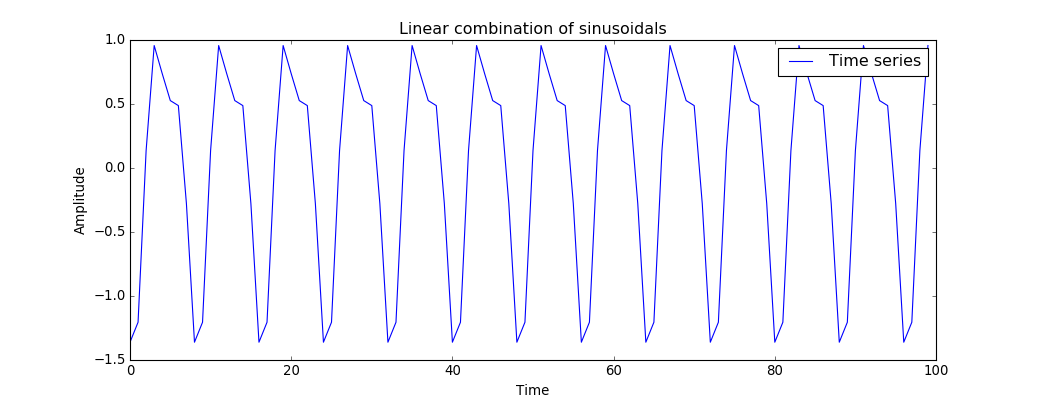

In [40]:
plt.figure(figsize=(13,5))
plt.plot(TS, label="Time series")
plt.title("Linear combination of sinusoidals")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.savefig('../reports/images/spectral_density_2/ts.png')

In [41]:
plt.close()

In [42]:
def get_acvf(h, k, sigma_sq, omegas):
    gamma = 0;
    for w in omegas:
        gamma = gamma + (sigma_sq**2 * np.cos(w * h))
    return gamma;

In [43]:
acvf_vals = []
pi_to_pi = np.linspace(-np.pi, np.pi, 200)
for h in pi_to_pi:
    acvf_vals.append(get_acvf(h, k, sigma, omega))

<IPython.core.display.Javascript object>


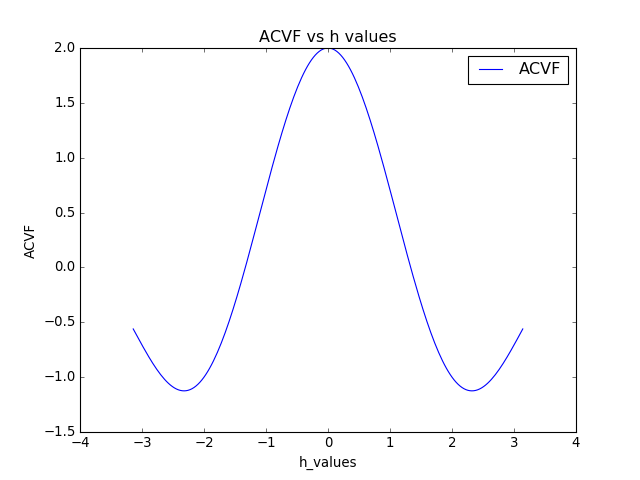

In [44]:
plt.plot(pi_to_pi, np.array(acvf_vals), label="ACVF")
plt.title("ACVF vs h values")
plt.xlabel("h_values")
plt.ylabel("ACVF")
plt.legend()
plt.savefig('../reports/images/spectral_density_2/acvf.png')

### Questions & Observations

* What is the range of h?
* What exactly does h represent here?
* An important observation is that we didn't use the samples in time series data to find the ACVF.
* Why does a number of values range from $-\pi$ to $\pi$

In [45]:
plt.close()

In [10]:
def get_spectral_distribution_function(llambda, k, sigma_sq, omegas):
    spec_distribution = 0;
    for w in omegas:
        F = 0.5
        if(llambda < (-1 * w)):
            F = 0
        elif (llambda >= w):
            F = 1.0
        
        spec_distribution = spec_distribution + (sigma_sq**2 * F)
    
    return spec_distribution;

<IPython.core.display.Javascript object>


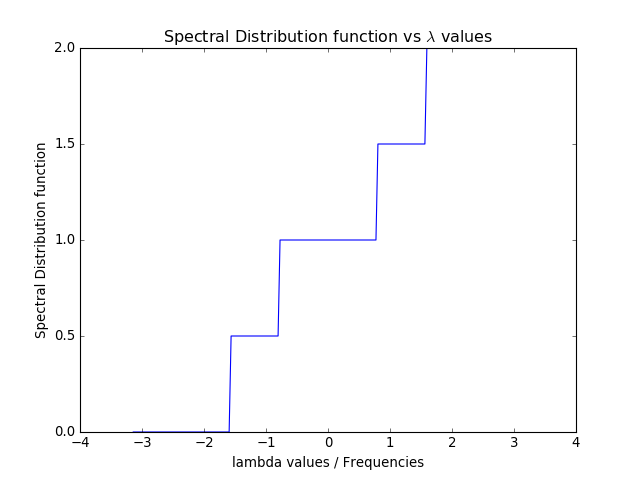

In [50]:
spec_density_vals = []
for l in pi_to_pi:
    spec_density_vals.append(get_spectral_distribution_function(l, k, sigma, omega))
    
plt.plot(pi_to_pi, np.array(spec_density_vals), label="Spectral Distribution function")
plt.title("Spectral Distribution function vs $\lambda$ values")
plt.xlabel("lambda values / Frequencies")
plt.ylabel("Spectral Distribution function")
plt.savefig('../reports/images/spectral_density_2/sd.png')
#plt.legend()

In [51]:
plt.close()

### Questions & Observations

* Why are frequency values negative?

In [13]:
spec_density_vals = np.array(spec_density_vals)

In [14]:
np.where(spec_density_vals[:-1] != spec_density_vals[1:])[0]

array([ 49,  74, 124, 149])

In [15]:
pi_to_pi[np.where(spec_density_vals[:-1] != spec_density_vals[1:])[0]]

array([-1.59447667, -0.80513179,  0.77355799,  1.56290288])

In [16]:
omega

array([ 1.57079633,  0.78539816])

### Peridogram for sum of sinusoidals

In [17]:
def get_peridogram(X, llambda, time):
    return (1/X.shape[0]) * np.power(np.absolute(np.sum(X * np.power(np.e, (-1J*time*llambda)))), 2)

In [47]:
peridograms = []

for l in np.linspace(-np.pi, np.pi, 200):
    peridograms.append(get_peridogram(TS[0:50], l, Time[0:50]))

<IPython.core.display.Javascript object>


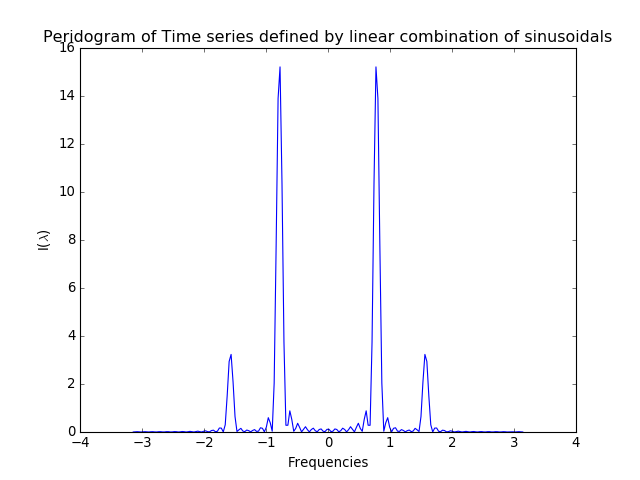

In [54]:
plt.title("Peridogram of Time series defined by linear combination of sinusoidals")
plt.plot(pi_to_pi, peridograms, label='Peridogram')
plt.xlabel("Frequencies")
plt.ylabel("I($\lambda$)")
plt.savefig('../reports/images/spectral_density_2/peri1.png')

In [55]:
plt.close()